Weight: 0 F1 Score Logistische Regression (k-fold): 0.0
Weight: 0 F1 Score Random Forest (k-fold): 0.0
Weight: 1 F1 Score Logistische Regression (k-fold): 0.0036244874675836827
Weight: 1 F1 Score Random Forest (k-fold): 0.0
Weight: 2 F1 Score Logistische Regression (k-fold): 0.07587824208890953
Weight: 2 F1 Score Random Forest (k-fold): 0.042024596958424545
Weight: 3 F1 Score Logistische Regression (k-fold): 0.2279615799899124
Weight: 3 F1 Score Random Forest (k-fold): 0.243403941853889
Weight: 4 F1 Score Logistische Regression (k-fold): 0.3077580529113283
Weight: 4 F1 Score Random Forest (k-fold): 0.3252594693183533
Weight: 5 F1 Score Logistische Regression (k-fold): 0.320948105016457
Weight: 5 F1 Score Random Forest (k-fold): 0.3381518040603802
Weight: 6 F1 Score Logistische Regression (k-fold): 0.31806317191504124
Weight: 6 F1 Score Random Forest (k-fold): 0.3397771571363707
Weight: 7 F1 Score Logistische Regression (k-fold): 0.3110290209673415
Weight: 7 F1 Score Random Forest (k-fo

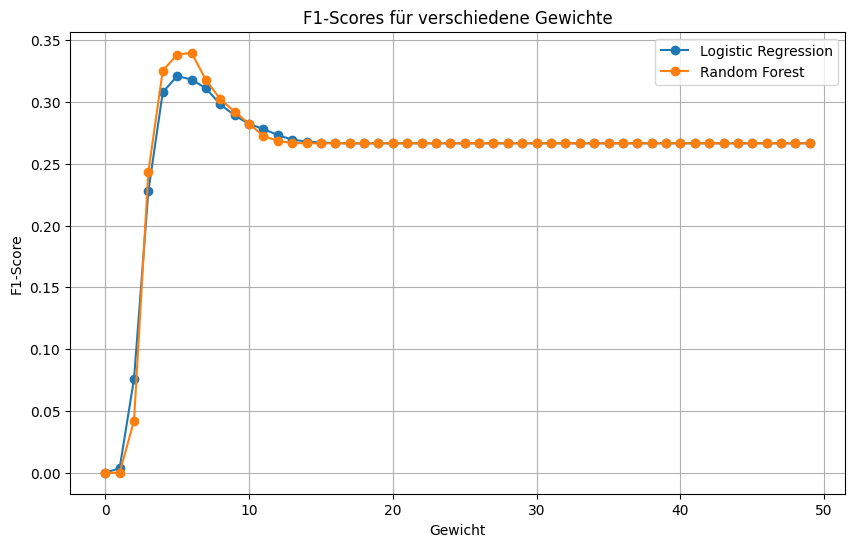

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('../data/GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]

#für tödliche und schwere vs. leichte Unfälle
y = df['UKATEGORIE'].isin([1, 2]).astype(int)
# -> 1 ist schwer oder tödlich, 0 ist leicht

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

import matplotlib.pyplot as plt

# Leere Listen für F1-Scores
f1_scores_log_reg = []
f1_scores_rf = []

weights = range(0, 50)

for i in weights:
    # Logistische Regression
    log_reg = LogisticRegression(max_iter=1000, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    f1_reg = cross_val_score(log_reg, X, y, cv=kf, scoring='f1')
    print(f"Weight: {i} F1 Score Logistische Regression (k-fold): { f1_reg.mean()}")
    
    f1_scores_log_reg.append(f1_reg.mean())
    

    # Random Forest
    rf_clas = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    f1_rf = cross_val_score(rf_clas, X, y, cv=kf, scoring='f1')
    print(f"Weight: {i} F1 Score Random Forest (k-fold): { f1_rf.mean()}")

    f1_scores_rf.append(f1_rf.mean())
    
# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(weights, f1_scores_log_reg, marker='o', label='Logistic Regression')
plt.plot(weights, f1_scores_rf, marker='o', label='Random Forest')
plt.title('F1-Scores für verschiedene Gewichte')
plt.xlabel('Gewicht')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()